# Types of Graphs

## Directed vs undirected

What we’ve been discussing is the “Un-Directed” graph, meaning a graph that describes which nodes are connected but without the concept of directionality. We can also create a “Directed” graph, which does concern direction.

For an un-directed graph, adding the edge (1,2) is equivalent to adding the edge (2,1). For a directed graph, the edge (1,2) is an edge that points from 1 to 2 , and (2,1) is an edge that points from 2 to 1 . Here, I’m defining the same edges for a directed and un-directed graph.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

undirected_graph = nx.Graph()

def construct(graph):
    graph.add_edge(1,2)
    graph.add_edge(1,2)
    graph.add_edge(2,1)
    graph.add_edge(1,3)
    graph.add_edge(1,4)
    graph.add_edge(4,2)

#standard, undirected graph
undirected_graph = nx.Graph()
construct(undirected_graph)

#standard, directed graph
directed_graph = nx.DiGraph()
construct(directed_graph)

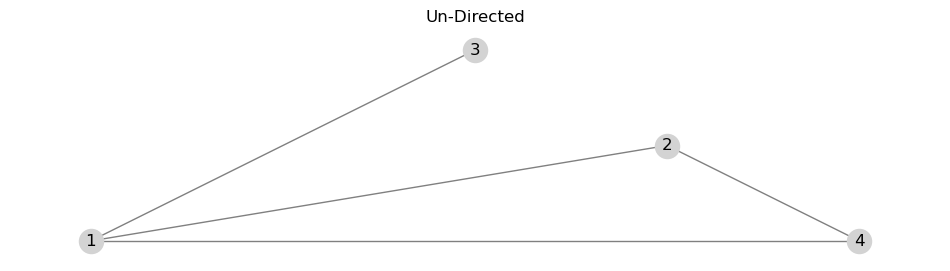

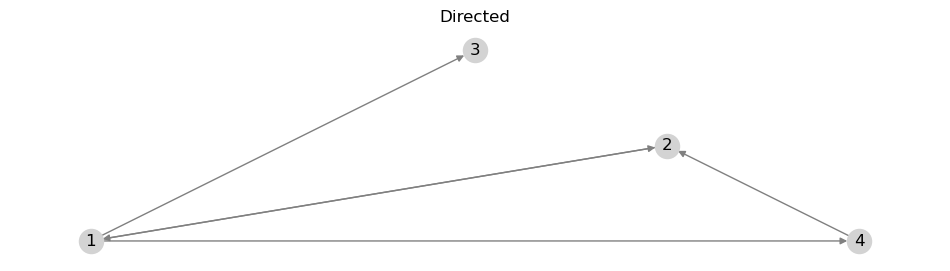

In [2]:
#rendering both
plt.figure(figsize=(12, 3))
plt.title('Un-Directed')
nx.draw_planar(undirected_graph, with_labels=True, node_color='lightgray', edge_color='gray')
plt.figure(figsize=(12, 3))
plt.title('Directed')
nx.draw_planar(directed_graph, with_labels=True, node_color='lightgray', edge_color='gray', arrows=True)

When defining an un-directed graph, defining the edges (1,2) and (2,1) is redundant, but in the directed graph, it results in nodes 2 and 1 pointing towards each other.

## Multigraph

You might notice, in the code above, that the `construct` function creates the edge (1,2) twice. This is redundant in both the un-directed graph and the directed graph. There’s another type of graph, called a “Multigraph” which does allow for duplicate edges. Multigraphs can either be directed or un-directed, just like normal graphs.

Here, I’m doing some black magic to render the edges so they’re visible, but you don’t have to worry a ton about it. The important part is to understand that a multigraph can have multiple edges between two nodes.

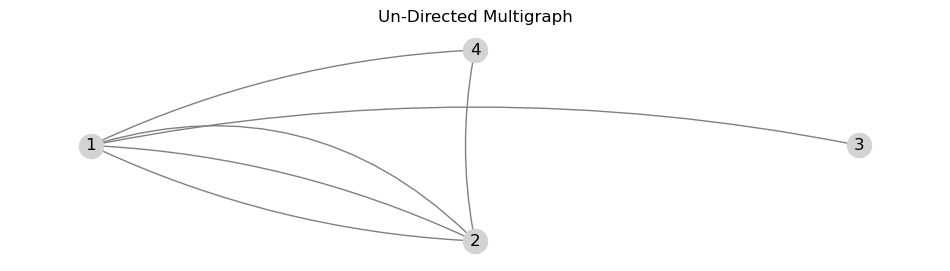

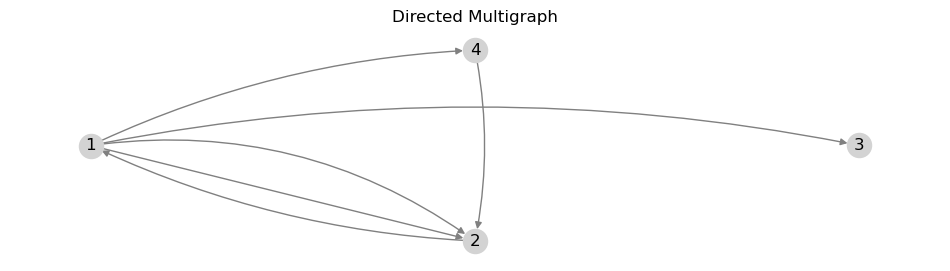

In [3]:
def draw_multigraph(G):
    pos = nx.shell_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightgray', edge_color='white', arrows=True)
    for (u, v, k) in G.edges(keys=True):
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], connectionstyle=f'arc3,rad={(k - len(G[u][v]) / 2) * 0.2}', edge_color='gray', arrows=True)
    plt.show()

def construct(graph):
    graph.add_edge(1,2)
    graph.add_edge(1,2)
    graph.add_edge(2,1)
    graph.add_edge(1,3)
    graph.add_edge(1,4)
    graph.add_edge(4,2)

#multi undirected graph
multi_graph = nx.MultiGraph()
construct(multi_graph)

multi_directed_graph = nx.MultiDiGraph()
construct(multi_directed_graph)

plt.figure(figsize=(12, 3))
plt.title('Un-Directed Multigraph')
draw_multigraph(multi_graph)

plt.figure(figsize=(12, 3))
plt.title('Directed Multigraph')
draw_multigraph(multi_directed_graph)

MultiGraphs certainly have their place, but most problems can be expressed more elegantly with traditional graphs, so we won’t be using them throughout this article.

Let’s explore a few ways of defining graphs next. This will be handy as it will allow us to create some complex graphs, which will help as we explore graph analysis.

# Methods of Defining Graphs

Previously, we used the add_edge function to add edges one by one. This is perfectly fine, but there are a variety of other approaches for defining graphs that may be useful in different use cases. Here are a few ways of defining the same graph:

import numpy as np

#adding edges one by one
graph1 = nx.Graph()
graph1.add_edge(1, 2)
graph1.add_edge(2, 3)
graph1.add_edge(3, 1)

#adding list of edges
graph2 = nx.Graph()
graph2.add_edges_from([(1, 2), (2, 3), (3, 1)])

#defining a graph based on a list of edges
edges = [(1, 2), (2, 3), (3, 1)]
graph3 = nx.from_edgelist(edges)

#this can be also be done by passing the edge list in the Graph constructor
graph5 = nx.Graph([(1, 2), (2, 3), (3, 1)])

#using an adjacency dictionary (which nodes are connected with which other nodes)
adj_dict = {1: [2, 3], 2: [1, 3], 3: [1, 2]}
graph6 = nx.Graph(adj_dict)

#using an adjacency matrix
adj_matrix = np.array([
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
])
graph7 = nx.from_numpy_array(adj_matrix)
Most of these are pretty straightforward, except perhaps the idea of “an adjacency matrix”. In an adjacency matrix, there’s a spot for each possible connection; then you place a 1 if there is a connection, and a 0 if there isn’t a connection.


the adjacency matrix specifies which nodes are connected with which other nodes. This particular matrix specifies that each node is connected with each other node, and that the nodes do not have edges which connect a node with themselves. Depending on how this matrix is filled out, you can also specify directionality in this matrix, where rows are the node which an edge is coming from, and columns are the node which the edge is pointing towards.
When defining a graph based on an adjacency matrix, there are no labels, so graph7 is slightly different from the other graphs in this example. It should still have the same structure, though, which we can test with nx.is_isomorphic (isomorphism being two graphs having the same structure)

"""Checking if all the graphs have the same structure
"""

import networkx as nx

graphs = [graph1, graph2, graph3, graph4, graph5, graph6]
n = len(graphs)

# Compare every graph with every other graph
isomorphic_groups = []
checked = set()

for i in range(n):
    for j in range(i + 1, n):
        if (i, j) not in checked:
            if nx.is_isomorphic(graphs[i], graphs[j]):
                isomorphic_groups.append((f"G{i+1}", f"G{j+1}"))
            else:
                raise ValueError('Not Isomorphic!')
            checked.add((i, j))

print('all graphs isomorphic (the same)')

Another useful way of defining a graph is by defining a “complete graph”. A complete graph is what you get when you fully connect some number of nodes. This is usually denoted as k{n} where n is the number of nodes. For instance, we can define a k4 graph with the following code:

"""Defining a complete graph
"""

graph = nx.complete_graph(4)
plt.figure(figsize=(12, 3))
nx.draw_circular(graph, with_labels=True, arrows=True, node_color='lightgray', edge_color='gray')
plt.show()

Naturally, this can be done with an arbitrary number of nodes. Here, I’m defining a k4 , k5 , k6 , and k7 graph.

"""Defining a few complete graphs of various sizes
"""

import networkx as nx
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 layout

sizes = [4, 5, 6, 7]  # Different complete graph sizes

for ax, n in zip(axes.flatten(), sizes):
    G = nx.complete_graph(n)
    pos = nx.circular_layout(G)  # Use circular layout
    nx.draw(G, pos, with_labels=True, arrows=True, node_color='lightgray', edge_color='gray', ax=ax)
    ax.set_title(f'K{n}')  # Title for each graph

plt.tight_layout()
plt.show()

Ok, cool, we’ve created a few graphs. Let’s go over some basic manipulation in the next section, then, we’ll explore more advanced graph manipulation and processing in the following sections.